In [24]:
import os

import numpy as np
import matplotlib.pyplot as plt

import h5py

In [25]:
basedir='../examples/Graphene'

# Relaxation Times

In [31]:
eV = 1.
Second = 1.
hbar = 6.582119569e-16 * eV * Second

datafn = basedir+'/el-ph/relaxation-times-fine.hdf5'

with h5py.File(datafn, 'r') as f:
    sysname = f['struct'].attrs['name']

    rates = (f['el-ph']['linewidths'][()] * eV) / hbar
    kBTs = f['el-ph']['linewidths'].attrs['kBTs'] * eV
    mus = f['el-ph']['linewidths'].attrs['mus'] * eV
    kpoints = f['el']['k-points'][()]
    epsk = f['el']['eps_kn'][()]* eV
    EF = f['el']['eps_kn'].attrs['EF']* eV

In [32]:
EF

-4.659554864918492

In [33]:
mus[0]-EF

0.1000020981856986

In [34]:
kBTs[0]

0.0259

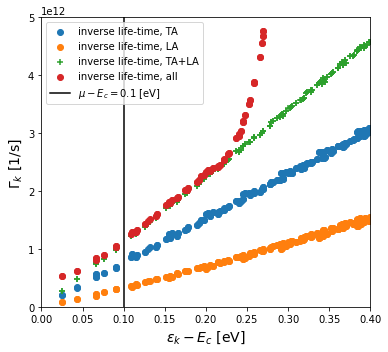

In [35]:
fig = plt.figure(figsize=(5.5,5))
ax1 = fig.add_subplot(1, 1, 1)

ax1.scatter(epsk[:,4]-EF, rates[0, :, 4, 0], label='inverse life-time, TA')
ax1.scatter(epsk[:,4]-EF, rates[0, :, 4, 1], label='inverse life-time, LA')
ax1.scatter(epsk[:,4]-EF, rates[0, :, 4, 0]+rates[0, :, 4, 1], label='inverse life-time, TA+LA', marker='+')
ax1.scatter(epsk[:,4]-EF, rates.sum(axis=3)[0, :, 4], label='inverse life-time, all')

ax1.axvline(x=mus[0]-EF, label=r'$\mu-E_c=%3.1f$ [eV]'%(mus[0]-EF), color='black')

plt.legend()
plt.xlim((0,0.4))
plt.ylim((0,0.5e13))
plt.xlabel(r'$\epsilon_k - E_c$ [eV]', fontsize=14)
plt.ylabel(r'$\Gamma_k$ [1/s]', fontsize=14)
plt.tight_layout()
plt.show()
#plt.savefig(basedir+'/el-ph/graphene-dftb-lifetimes.pdf')